## Resume 1

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('data/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/data\ACCOUNTANT\10554236.pdf
data/data\ACCOUNTANT\10674770.pdf
data/data\ACCOUNTANT\11163645.pdf
data/data\ACCOUNTANT\11759079.pdf
data/data\ACCOUNTANT\12065211.pdf
data/data\ACCOUNTANT\12202337.pdf
data/data\ACCOUNTANT\12338274.pdf
data/data\ACCOUNTANT\12442909.pdf
data/data\ACCOUNTANT\12780508.pdf
data/data\ACCOUNTANT\12802330.pdf
data/data\ACCOUNTANT\13072019.pdf
data/data\ACCOUNTANT\13130984.pdf
data/data\ACCOUNTANT\13294301.pdf
data/data\ACCOUNTANT\13491889.pdf
data/data\ACCOUNTANT\13701259.pdf
data/data\ACCOUNTANT\14055988.pdf
data/data\ACCOUNTANT\14126433.pdf
data/data\ACCOUNTANT\14224370.pdf
data/data\ACCOUNTANT\14449423.pdf
data/data\ACCOUNTANT\14470533.pdf
data/data\ACCOUNTANT\14491649.pdf
data/data\ACCOUNTANT\14496667.pdf
data/data\ACCOUNTANT\15289348.pdf
data/data\ACCOUNTANT\15363277.pdf
data/data\ACCOUNTANT\15592167.pdf
data/data\ACCOUNTANT\15821633.pdf
data/data\ACCOUNTANT\15906625.pdf
data/data\ACCOUNTANT\16237710.pdf
data/data\ACCOUNTANT\17306905.pdf
data/data\ACCO

In [37]:
resume_data = pd.read_csv("Resume/Resume 1.csv")
print(resume_data) 

            ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface

In [38]:

# Afficher les valeurs uniques de la colonne 'Category'
unique_categories = resume_data['Category'].unique()

# Afficher les valeurs uniques
print("Valeurs uniques de la colonne 'Category':")
print(unique_categories)


Valeurs uniques de la colonne 'Category':
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


In [39]:
nombre_de_categories = resume_data['Category'].nunique()
print(nombre_de_categories)


24


<Axes: xlabel='Category'>

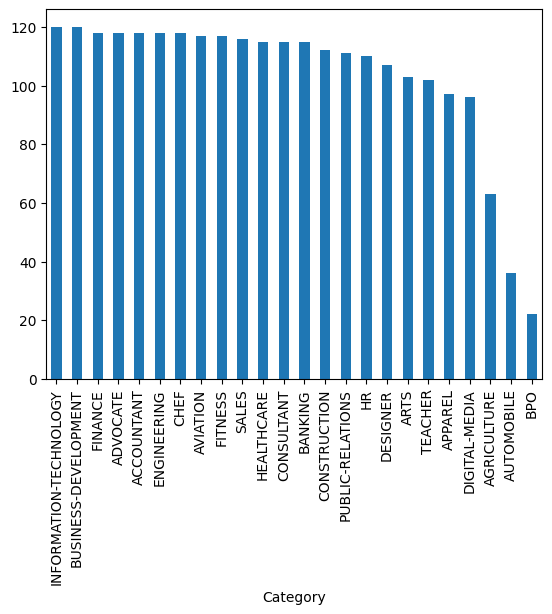

In [40]:
resume_data['Category'].value_counts(sort=True).nlargest(24).plot.bar()

(array([], dtype=float64), [])

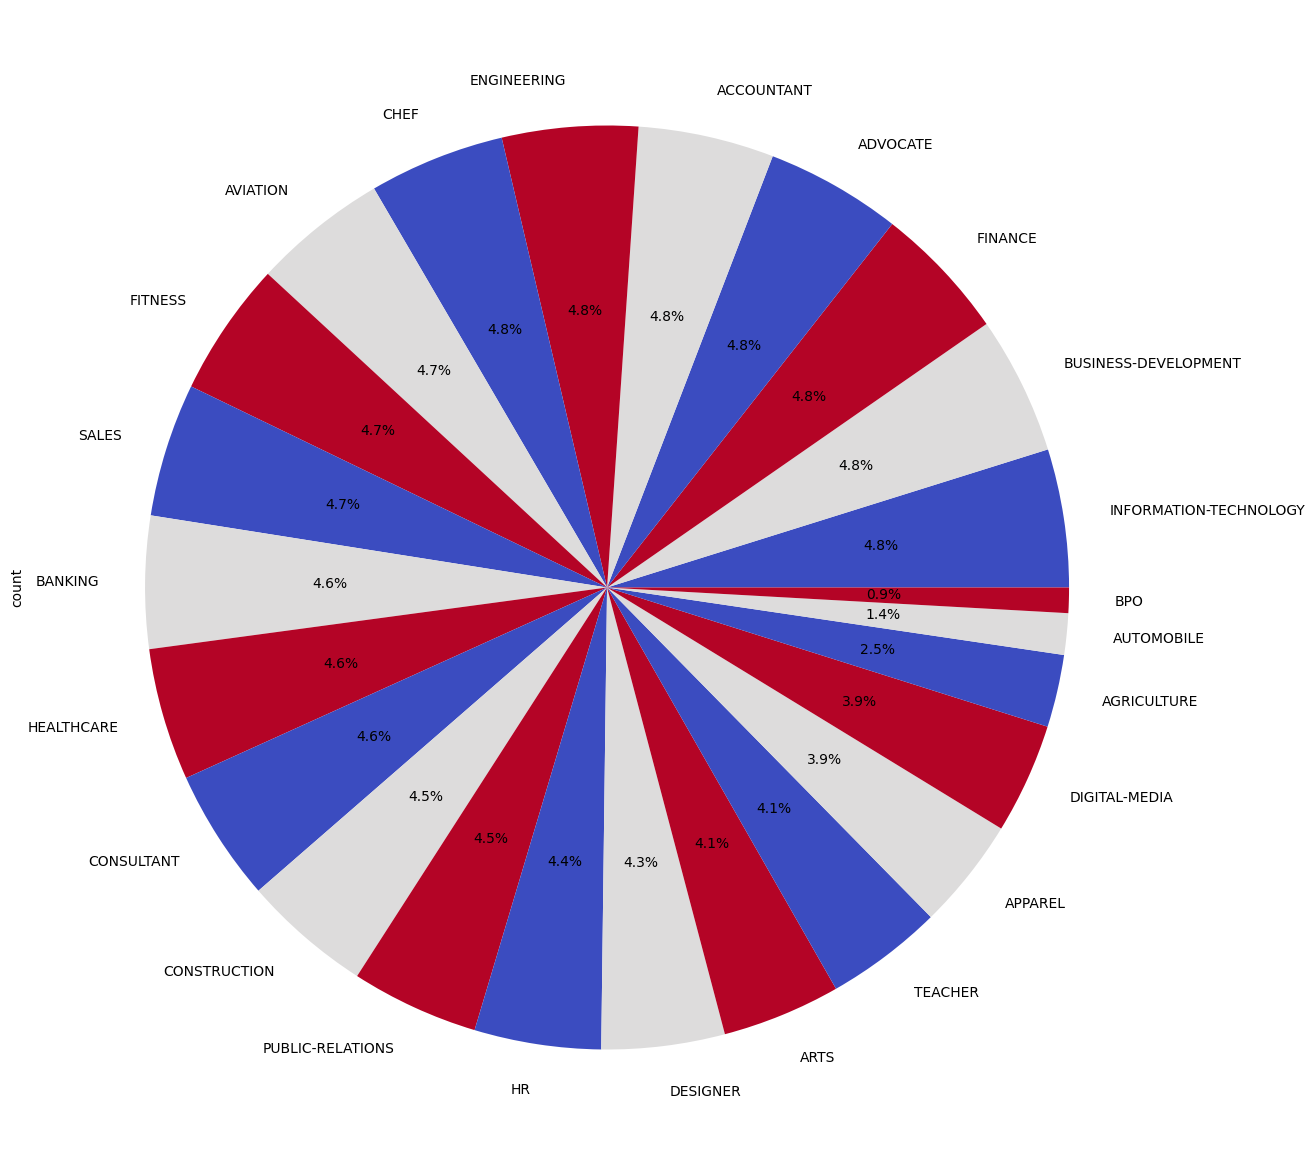

In [41]:
plt.figure(figsize=(15,15))
resume_data['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.xticks(rotation=90)

In [42]:
from PyPDF2 import PdfReader
def extract_text_from_pdf(file_path):
    reader = PdfReader(file_path)
    text = "".join(page.extract_text() for page in reader.pages)
    return text

In [43]:
from nltk import pos_tag, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re

def preprocess_text(text):
    text = text.lower()
    sentences = sent_tokenize(text)
    features = {'feature': ""}
    stop_words = set(stopwords.words("english"))
    
    for sent in sentences:
        if any(criteria in sent for criteria in ['skills', 'education','qualifications','hr', 'designer', 'information-technology', 'teacher', 'advocate','business-development', 'healthcare', 'fitness', 'agriculture', 'bpo', 'sales','consultant', 'digital-media', 'automobile', 'chef', 'finance', 'apparel','engineering', 'accountant', 'construction', 'public-relations', 'banking','arts', 'aviation']):  # ajouter d'autres commeles catgories 
            words = word_tokenize(sent)
            words = [word for word in words if word not in stop_words]
            tagged_words = pos_tag(words)
            filtered_words = [word for word, tag in tagged_words if tag not in ['DT', 'IN', 'TO', 'PRP', 'WP']]
            features['feature'] += " ".join(filtered_words) + " "
    
    # Nettoyer les espaces superflus
    features['feature'] = re.sub('[^a-zA-Z]', ' ', features['feature'])
    features['feature'] = ' '.join(features['feature'].split())  # Enlever les espaces multiples
    return features

In [44]:
def process_resume_data(df):
    id = df['ID']
    category = df['Category']
    text = extract_text_from_pdf(f"data/data/{category}/{id}.pdf")
    features = preprocess_text(text)
    df['Feature'] = features['feature']
    return df

In [45]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]    |

True

In [46]:
resume_data = pd.read_csv("Resume/Resume 1.csv")
resume_data = resume_data.drop(["Resume_html"], axis=1)
resume_data = resume_data.apply(process_resume_data, axis=1)
resume_data = resume_data.drop(columns=['Resume_str'])
resume_data.to_csv("Resume_Clean/Resume 1_clean.csv", index=False)

In [47]:
resume_data['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [48]:
resume_data


,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...
2479,99416532,AVIATION,excellent problem solving interpersonal skills...
2480,24589765,AVIATION,government relations communications organizati...
2481,31605080,AVIATION,qualifications windows mac ios android technic...
2482,21190805,AVIATION,demonstrated ability develop maintain relation...


## Resume 2

In [49]:
data = pd.read_csv("Resume/Resume 2.csv")

In [50]:
nombre_de_categories = data['Category'].nunique()
print(nombre_de_categories)

25


In [51]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

(array([], dtype=float64), [])

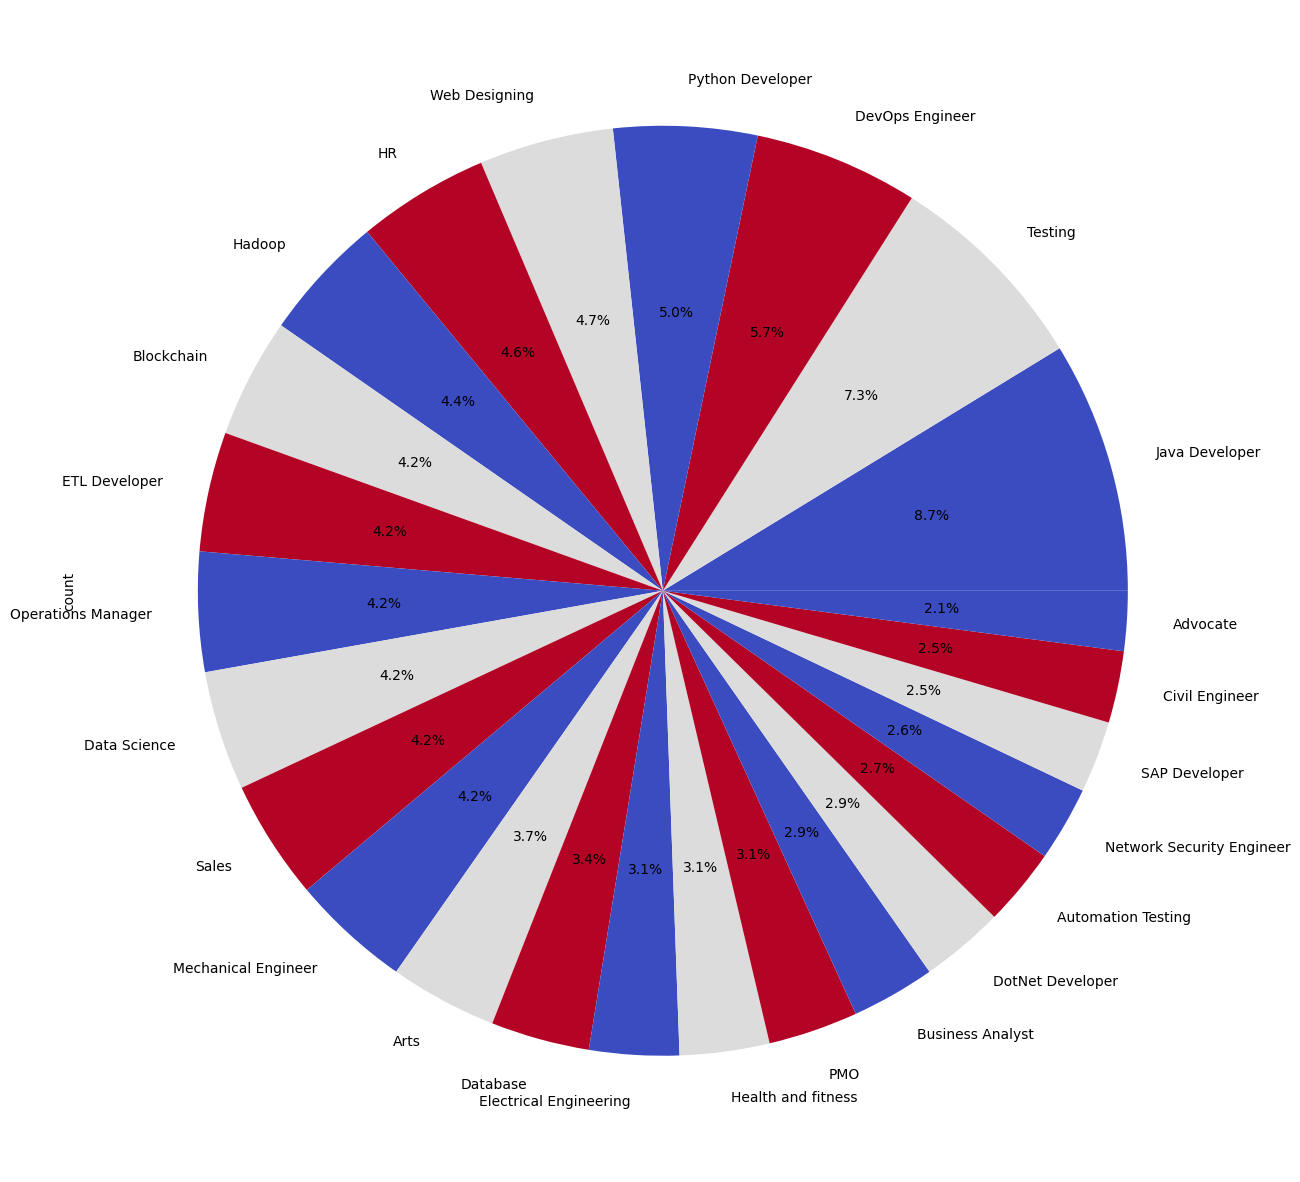

In [52]:
plt.figure(figsize=(15,20))
data['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.xticks(rotation=90)

<Axes: xlabel='Category'>

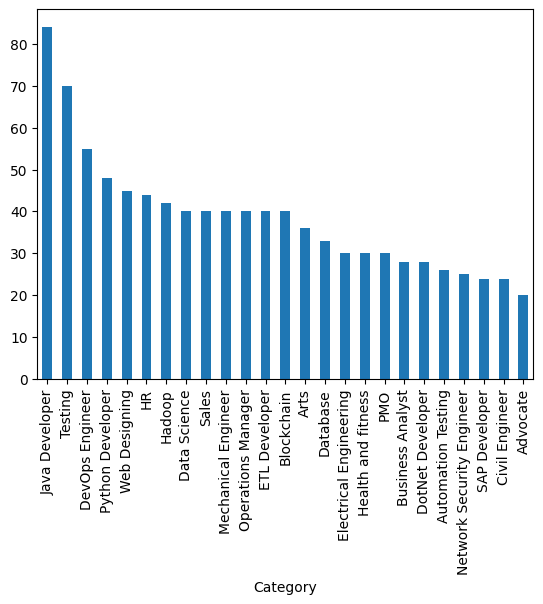

In [53]:
#Visualization of various categories
data['Category'].value_counts(sort=True).nlargest(25).plot.bar()

In [54]:
import re
import string
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    #convert text to lowercase
    text = text.lower() 
    #remove any numeric characters
    text = ''.join([word for word in text if not word.isdigit()]) 

#     text = [word for word in text if re.search("\d", word)== None]
    # remove URLs
    text = re.sub('http\S+\s*', ' ', text)  
    # remove RT and cc
    text = re.sub('RT|cc', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', '', text)  
    # remove mentions
    text = re.sub('@\S+', '  ', text)  
    #punctuations removal
    text = "".join([word for word in text if word not in string.punctuation])
    text = re.sub("\W", " ", str(text))
    #stopwords removal
    ext = [word for word in text.split() if word not in stopwords]
    #replace consecutive non-ASCII characters with a space
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    #extra whitespace removal
    text = re.sub('\s+', ' ', text)
    return text

data['Resume'] = data['Resume'].apply(lambda x: clean_text(x))
data.to_csv("Resume_Clean/Resume 2_clean.csv", index=False)

<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\W'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\S'
<>:24: SyntaxWarning: invalid escape sequence '\W'
<>:30: SyntaxWarning: invalid escape sequence '\s'
C:\Users\pc\AppData\Local\Temp\ipykernel_16344\842171065.py:15: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+\s*', ' ', text)
C:\Users\pc\AppData\Local\Temp\ipykernel_16344\842171065.py:19: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('#\S+', '', text)
C:\Users\pc\AppData\Local\Temp\ipykernel_16344\842171065.py:21: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('@\S+', '  ', text)
C:\Users\pc\AppData\Local\Temp\ipykernel_16344\84217106

## Resume 3

In [55]:
data_S = pd.read_csv('Resume/Resume 3.csv')

In [56]:
data_S['Category'].unique()

array(['HR', 'Designing', 'Managment', 'Information Technology',
       'Education', 'Advocate', 'Business Development',
       'Health & Fitness', 'Agricultural', 'BPO', 'Sales', 'Consultant',
       'Digital Media', 'Automobile', 'Food & Beverages', 'Finance',
       'Apparel', 'Engineering', 'Accountant', 'Building & Construction',
       'Architects', 'Public Relations', 'Banking', 'Arts', 'Aviation'],
      dtype=object)

In [57]:
nombre_de_categories = data_S['Category'].nunique()
print(nombre_de_categories)

25


(array([], dtype=float64), [])

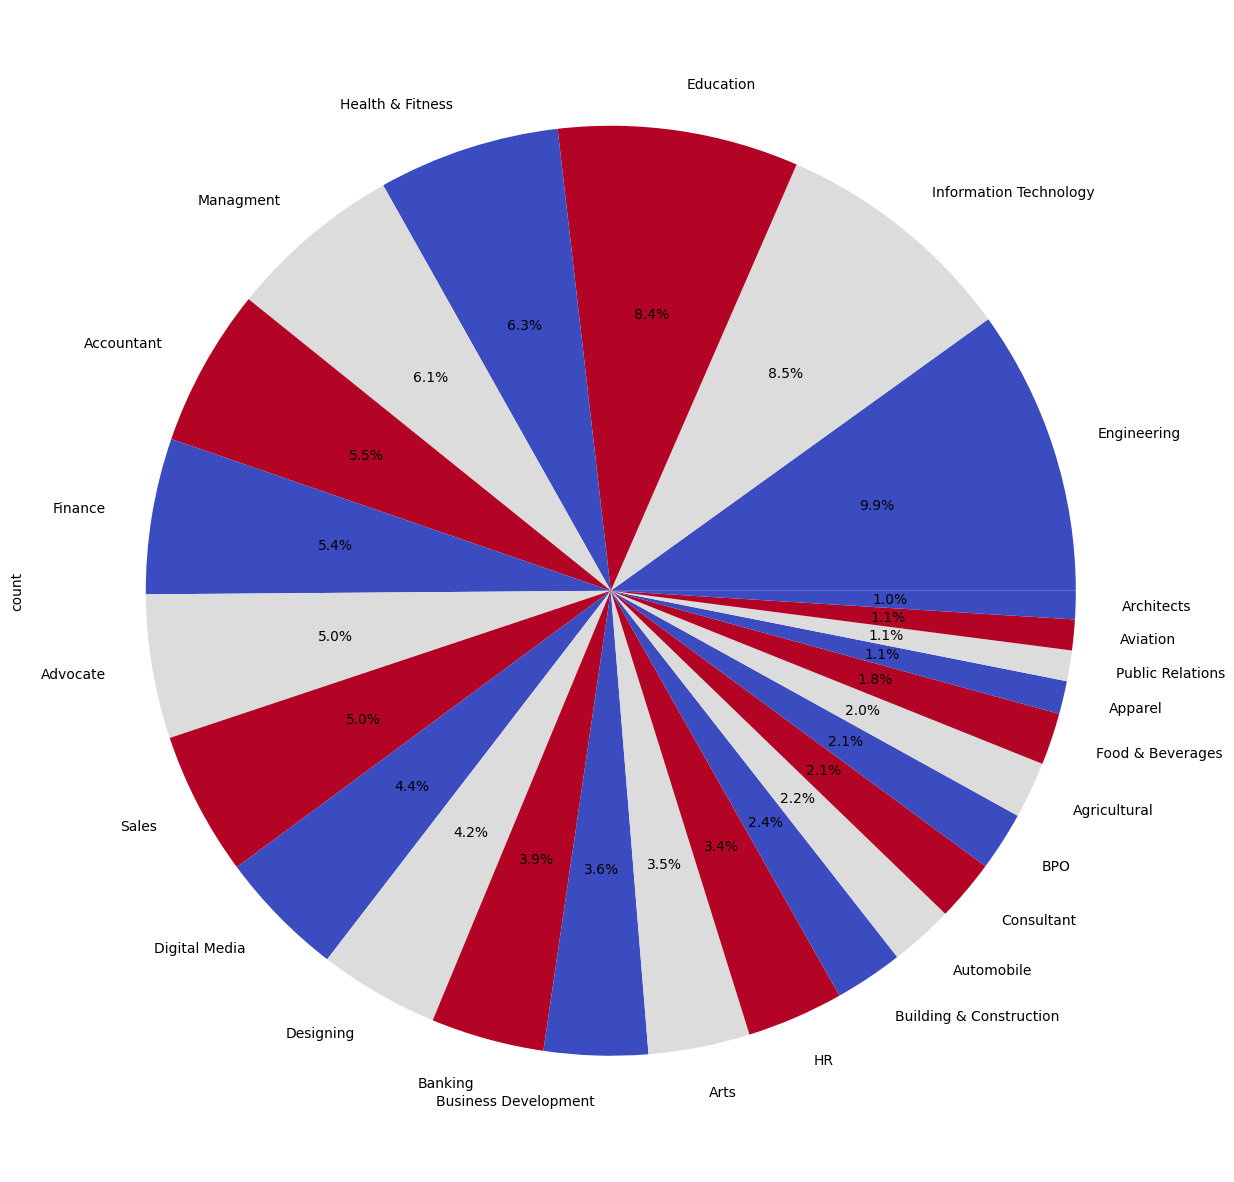

In [58]:
plt.figure(figsize=(15,20))
data_S['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.xticks(rotation=90)

<Axes: xlabel='Category'>

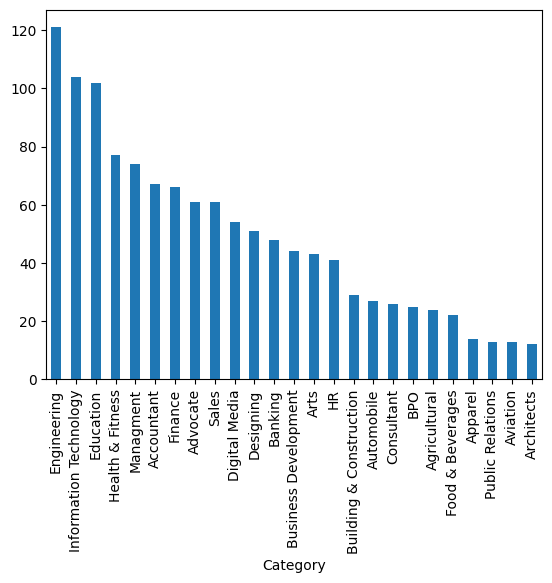

In [59]:
data_S['Category'].value_counts(sort=True).nlargest(25).plot.bar()

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
###
def clean_text(text):
    text = re.sub(r'[^a-z\s]', ' ', text)  # Garder uniquement les lettres et les espaces
    text = re.sub(r'\s+', ' ', text)     # Remplacer les espaces multiples par un seul espace
    return text.strip()
####
stop_words = set(stopwords.words('english') + stopwords.words('french'))  # Ajouter les langues nécessaires

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])
######

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

#####


def nettoyer_email_telephone_url(texte):
    if isinstance(texte, str):
        # Supprimer les adresses e-mail
        texte = re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', texte)
        
        # Supprimer les numéros de téléphone (formats courants)
        texte = re.sub(r'\b\d{10}\b', '', texte)  # 10 chiffres consécutifs
        texte = re.sub(r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b', '', texte)  # Format US (123-456-7890, etc.)
        texte = re.sub(r'\b\+\d{1,3}[-.\s]?\d{1,4}[-.\s]?\d{4,}\b', '', texte)  # Format international (+XX XXXX XXXX)
        texte = re.sub(r'\b\d{2,4}[-.\s]?\d{2,4}[-.\s]?\d{2,4}\b', '', texte)  # Autres formats courants (1234-567-890, etc.)
        
        # Supprimer les liens URL (ex: http://example.com, https://example.com, www.example.com)
        texte = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', texte)
        texte = re.sub(r'www\.[a-zA-Z0-9.-]+', '', texte)
        
        # Supprimer les espaces multiples résultants
        texte = re.sub(r'\s+', ' ', texte)
        
        return texte.strip()  # Retirer les espaces au début et à la fin
    return texte

#############

def supprimer_mots_sans_signification(texte):
    texte = re.sub(r'\b[a-zA-Z]\b', '', texte)  # Supprime les mots d'un seul caractère (lettres)
            # 2. Supprimer les mots courts qui sont probablement sans signification (comme "xxx", "xxxx", etc.)
    texte = re.sub(r'\b(?:xxxxx|xxxx|xxx|xx|x|b|g|n|e|f)\b', '', texte)  # Ajouter plus de mots inutiles ici si nécessaire
        
    texte = re.sub(r'\s+', ' ', texte)
    return texte.strip()  # Retirer les espaces au début et à la fin
 

#######
def nettoyer_texte(texte):
    """
    Fonction pour supprimer les artefacts d'encodage, les retours à la ligne,
    et les espaces inutiles dans une chaîne de texte.
    """
    if isinstance(texte, str):
        # Suppression des artefacts d'encodage spécifiques
        texte = re.sub(r'(\\x[0-9a-fA-F]{2})+', '', texte)  # Supprime tous les codes hexadécimaux (\xe2\x80\x9c, etc.)
        texte = re.sub(r'\\n', ' ', texte)  # Supprime les symboles de saut de ligne "\n" explicites

        texte = re.sub(r'\s+', ' ', texte)  # Remplace plusieurs espaces consécutifs par un seul espace
        return texte.strip()  # Supprime les espaces superflus en début et fin
    return texte

# Charger les données
data = pd.read_csv('Resume/Resume 3.csv')

# Appliquer le nettoyage sur la colonne 'Resume'
data['Resume'] = data['Resume'].apply(nettoyer_texte)

data['Resume'] = data['Resume'].apply(nettoyer_email_telephone_url)
# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Supprimer les lignes contenant des valeurs manquantes (ou les imputer)
data.dropna(subset=['Resume', 'Category'], inplace=True)

data['Resume'] = data['Resume'].str.lower()


data['Resume'] = data['Resume'].apply(clean_text)

data['Resume'] = data['Resume'].apply(remove_stopwords)


data['Resume'] = data['Resume'].apply(lemmatize_text)

data['Resume'] = data['Resume'].apply(supprimer_mots_sans_signification)
# Sauvegarder le fichier nettoyé
data.to_csv('Resume_Clean/Resume 3_clean.csv', index=False, encoding='utf-8')


ID          0
Category    0
Resume      0
dtype: int64


## Concatination des 3 Resumes

In [86]:
import pandas as pd

# Charger les fichiers CSV
fichier1 = pd.read_csv('Resume_Clean/Resume 1_clean.csv')  
fichier2 = pd.read_csv('Resume_Clean/Resume 2_clean.csv')  
fichier3 = pd.read_csv('Resume_Clean/Resume 3_clean.csv') 


# Concaténer les DataFrames
data_concatene = pd.concat([fichier1, fichier2,fichier3], ignore_index=True)

# Dictionnaire de correspondance des catégories
category_mapping = {
    'hr': 'HR',
    'human resources': 'HR',

    'designer': 'Designer',
    'designing': 'Designer',
    'web designing': 'Designer',
    'arts': 'Designer',

    'information technology': 'Information Technology',
    'information-technology': 'Information Technology',

    'teacher': 'Education',
    'education': 'Education',

    'advocate': 'Advocate',

    'business development': 'Business Development',

    'healthcare': 'Health & Fitness',
    'health and fitness': 'Health & Fitness',
    'fitness': 'Health & Fitness',

    'agriculture': 'Agricultural',
    'agricultural': 'Agricultural',

    'bpo': 'BPO',

    'sales': 'Sales',

    'consultant': 'Consultant',

    'digital media': 'Digital Media',

    'automobile': 'Automobile',

    'chef': 'chef',

    'finance': 'Finance',

    'apparel': 'Apparel',

    'engineering': 'Engineering',
    'mechanical engineer': 'Engineering',
    'civil engineer': 'Engineering',
    'electrical engineering': 'Engineering',

    'accountant': 'Accountant',

    'construction': 'Building & Construction',
    'building & construction': 'Building & Construction',
    'architects': 'Building & Construction',

    'public relations': 'Public Relations',

    'banking': 'Banking',

    'aviation': 'Aviation',

    'data science': 'Data Science',

    'business analyst': 'Business Analyst',

    'sap developer': 'SAP Developer',

    'automation testing': 'Testing',
    'testing': 'Testing',

    'python developer': 'Developer',
    'java developer': 'Developer',
    'devops engineer': 'Developer',
    'dotnet developer': 'Developer',

    'hadoop': 'Database',
    'etl developer': 'Database',

    'network security engineer': 'Security',

    'pmo': 'Management',
    'operations manager': 'Management',

    'blockchain': 'Blockchain'
}


# Fonction de standardisation des catégories
def standardize_category(category):
    category = str(category).lower().replace('_', ' ').strip()  # Normalisation de la casse et des underscores
    return category_mapping.get(category, category)  # Mapper ou conserver l'original si absent du mapping

# Appliquer la normalisation des catégories
data_concatene['Category'] = data_concatene['Category'].apply(standardize_category)

# Compter le nombre de lignes avec des valeurs manquantes dans les colonnes importantes
lignes_manquantes = data_concatene['Resume'].isna().sum() + data_concatene['Category'].isna().sum()

# Supprimer les lignes avec des valeurs manquantes dans les colonnes importantes
data_concatene.dropna(subset=['Resume', 'Category'], inplace=True)

# Sauvegarder dans un nouveau fichier CSV
data_concatene.to_csv('Resume_Clean/Concate_Resume.csv', index=False, encoding='utf-8')

print(f"Nombre de lignes supprimées en raison de valeurs manquantes : {lignes_manquantes}")


Nombre de lignes supprimées en raison de valeurs manquantes : 14


In [87]:
data_concatene['Category'].unique()

array(['HR', 'Designer', 'Information Technology', 'Education',
       'Advocate', 'business-development', 'Health & Fitness',
       'Agricultural', 'BPO', 'Sales', 'Consultant', 'digital-media',
       'Automobile', 'chef', 'Finance', 'Apparel', 'Engineering',
       'Accountant', 'Building & Construction', 'public-relations',
       'Banking', 'Aviation', 'Data Science', 'Developer',
       'Business Analyst', 'SAP Developer', 'Testing', 'Management',
       'Security', 'database', 'Database', 'Blockchain', 'managment',
       'Business Development', 'health & fitness', 'Digital Media',
       'food & beverages', 'Public Relations'], dtype=object)

In [88]:
print (data_concatene['Category'].value_counts())

Category
Designer                   385
Engineering                331
Health & Fitness           262
Information Technology     224
Sales                      216
Developer                  215
Education                  204
Advocate                   198
HR                         195
Accountant                 185
Finance                    182
Banking                    163
Building & Construction    152
Consultant                 141
Aviation                   130
business-development       119
chef                       118
public-relations           111
Apparel                    111
digital-media               96
Testing                     96
Agricultural                87
Database                    82
health & fitness            76
managment                   72
Management                  70
Automobile                  62
Digital Media               52
BPO                         47
Business Development        44
Data Science                40
Blockchain                  40

In [89]:
nombre_de_categories = data_concatene['Category'].nunique()
print(nombre_de_categories)

38


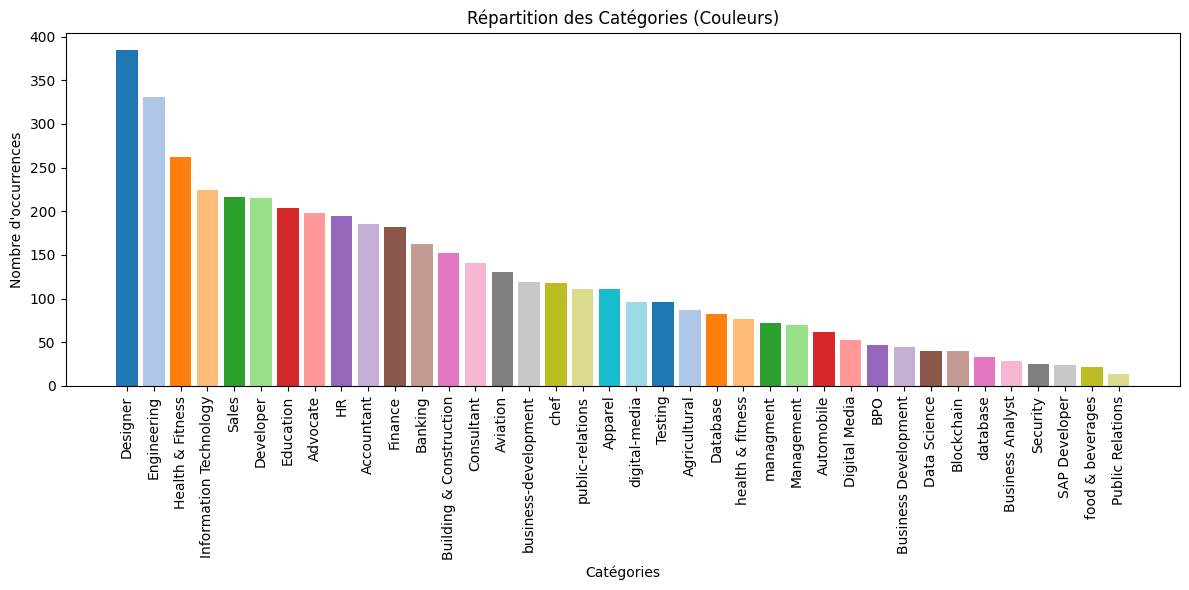

In [90]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Compter les occurrences de chaque catégorie
category_counts = data_concatene['Category'].value_counts()

# Générer une palette de couleurs unique pour chaque catégorie
colors = cm.tab20.colors[:len(category_counts)]  # Limité à 20 couleurs, ajustez si nécessaire

# Création du graphique à barres avec des couleurs uniques
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values, color=colors)
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des Catégories (Couleurs)')
plt.xticks(rotation=90)  # Faire pivoter les étiquettes pour les rendre lisibles
plt.tight_layout()

# Afficher le graphique
plt.show()


(array([], dtype=float64), [])

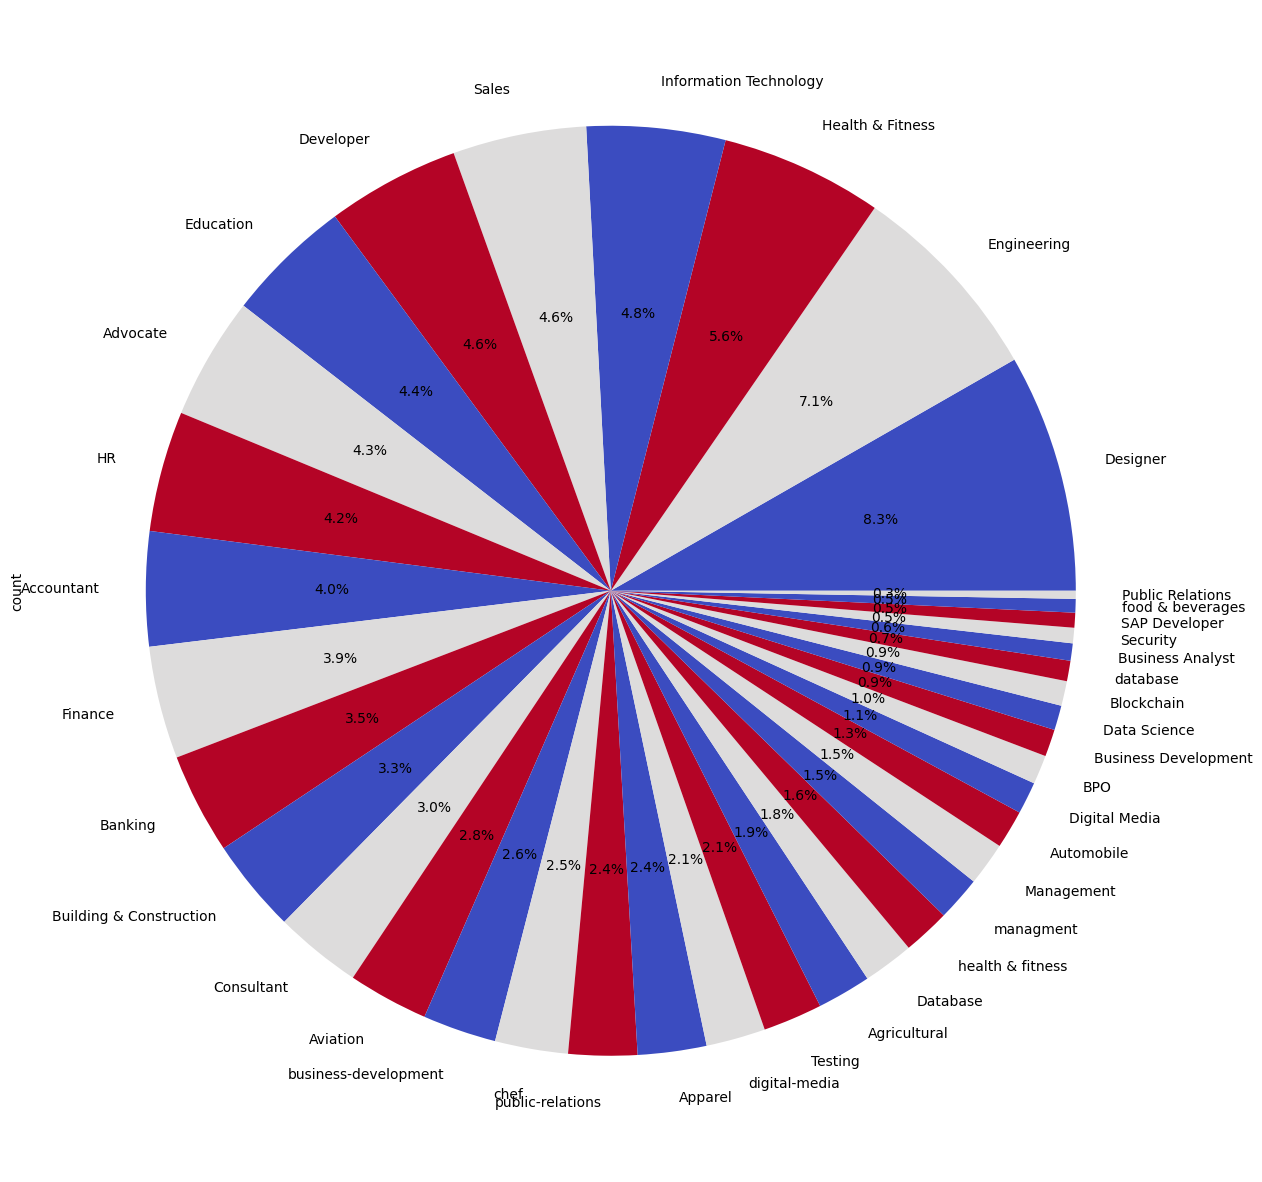

In [91]:
plt.figure(figsize=(15,20))
data_concatene['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.xticks(rotation=90)